In [2]:
import os
from glob import glob
import re

from collections import namedtuple

import time
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import numpy as np

import itertools

import face_recognition

import cv2

from matplotlib import patches

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from tqdm.notebook import tqdm

In [5]:
from fer import FER

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
detector = FER()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


11-10-2020:23:57:13,812 WARNING  [deprecation.py:323] From /Users/joowhan/opt/anaconda3/envs/twitch_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training_v1.py:2070: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [7]:
# cap = cv2.VideoCapture(video_file)

# for i in tqdm(range(1000)):
#     ret, frame = cap.read()

# frame = np.stack((frame[:, :, 2], frame[:, :, 1], frame[:, :, 0]), axis=2)

# plt.figure()
# plt.imshow(frame)
# plt.show()

# for i in tqdm(range(1000)):
#     ret, frame = cap.read()

# frame = np.stack((frame[:, :, 2], frame[:, :, 1], frame[:, :, 0]), axis=2)

# plt.figure()
# plt.imshow(frame)
# plt.show()

# cap = cv2.VideoCapture(video_file)

# for i in tqdm(range(1000)):
#     ret = cap.grab()
    
# for i in tqdm(range(1000)):
#     ret = cap.grab()

In [8]:
# cap = cv2.VideoCapture(video_file)

# for i in range(1000):
#     ret_grab = cap.grab()
#     ret, frame = cap.read()

# frame = np.stack((frame[:, :, 2], frame[:, :, 1], frame[:, :, 0]), axis=2)

# plt.figure()
# plt.imshow(frame)
# plt.show()

In [9]:
emotional_history = {
    'angry': list(), 
    'disgust': list(), 
    'fear': list(), 
    'happy': list(), 
    'sad': list(), 
    'surprise': list(), 
    'neutral': list(),
}

nan_emotion = {
    'angry': np.NaN, 
    'disgust': np.NaN, 
    'fear': np.NaN, 
    'happy': np.NaN, 
    'sad': np.NaN, 
    'surprise': np.NaN, 
    'neutral': np.NaN,
}

In [11]:
video_file = '../videos/20201003_759209688_Just Chatting.mp4'

Video reading took 03.8726
Face Recog. took 00.4876
Face Emotion Recog. took 00.5523


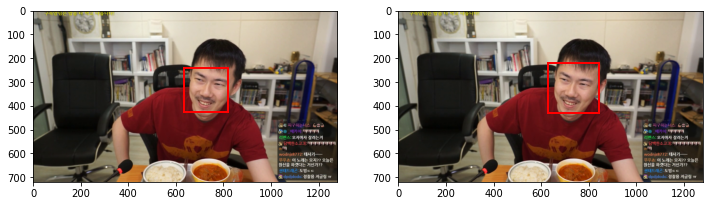

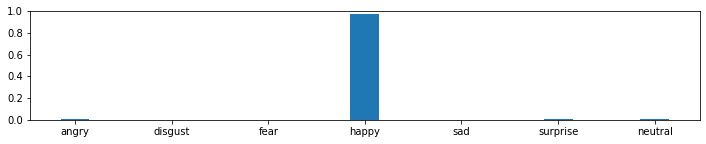

Video reading took 05.60
Face Recog. took 00.4523
Face Emotion Recog. took 00.850


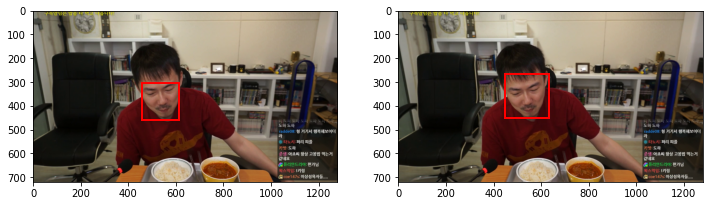

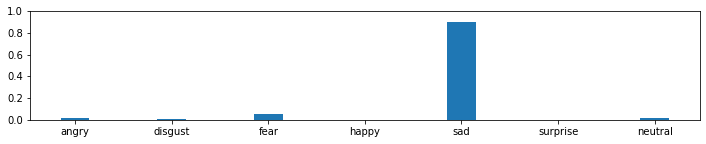

Video reading took 04.6562
Face Recog. took 00.4469
Face Emotion Recog. took 00.912


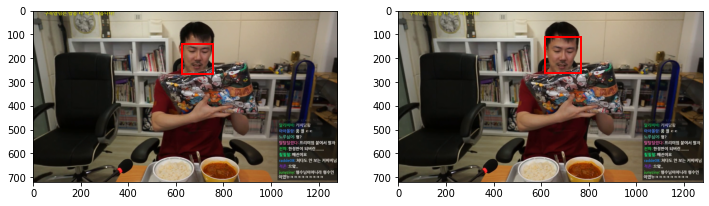

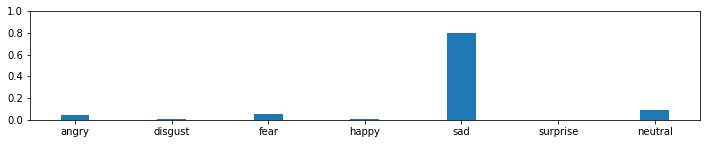

Video reading took 04.7504
Face Recog. took 00.4584
Face Emotion Recog. took 00.868


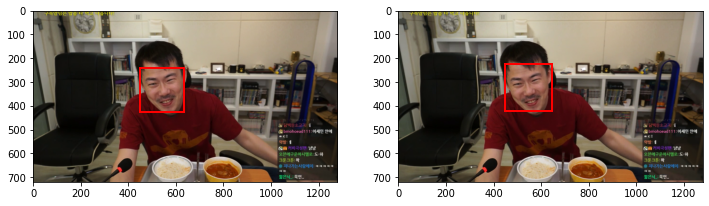

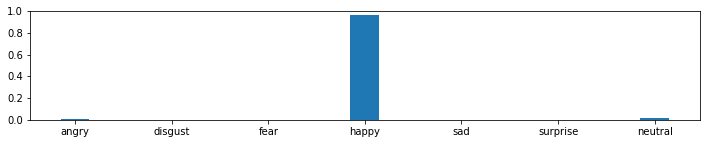

Video reading took 04.8882
Face Recog. took 00.4534
Face Emotion Recog. took 00.851


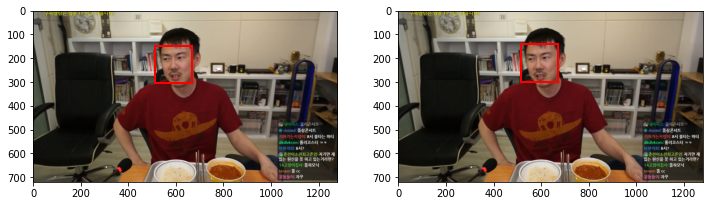

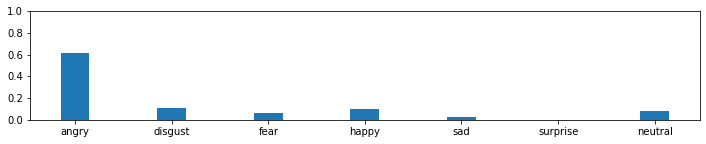

Video reading took 04.9745
Face Recog. took 00.4677
Face Emotion Recog. took 00.748


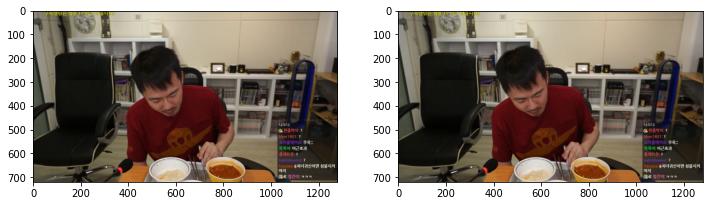

Video reading took 05.798
Face Recog. took 00.4437
Face Emotion Recog. took 00.810


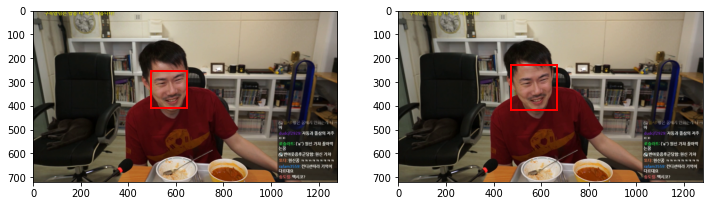

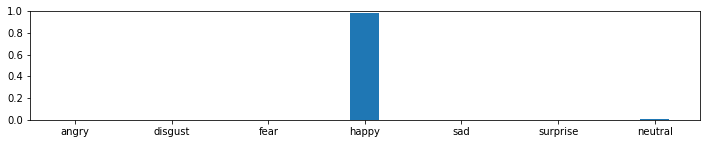

Video reading took 05.1119
Face Recog. took 00.4425
Face Emotion Recog. took 00.829


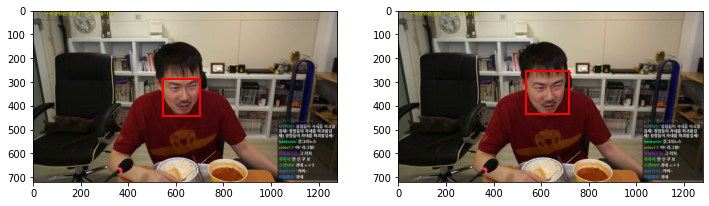

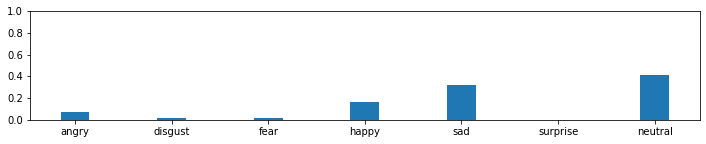

Video reading took 04.7471
Face Recog. took 00.4601
Face Emotion Recog. took 00.786


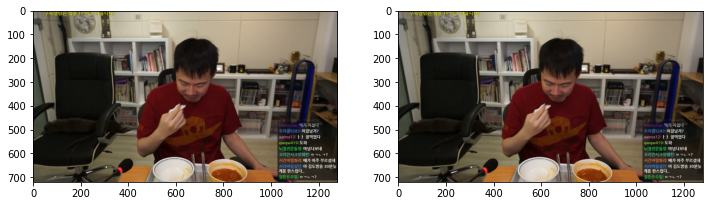

Video reading took 04.4680
Face Recog. took 00.4425
Face Emotion Recog. took 00.875


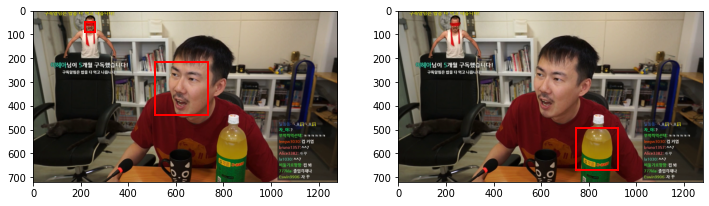

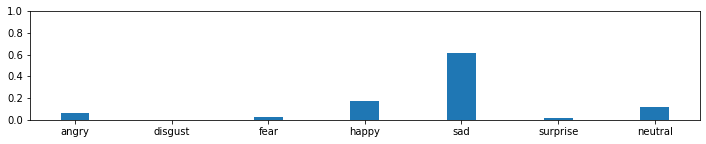

Video reading took 05.562
Face Recog. took 00.4318
Face Emotion Recog. took 00.959


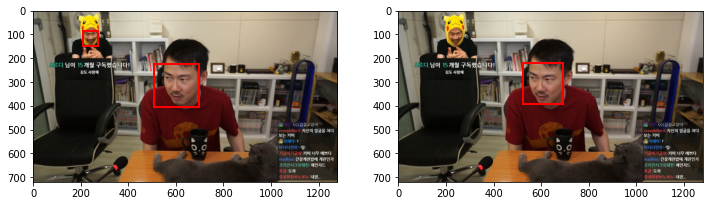

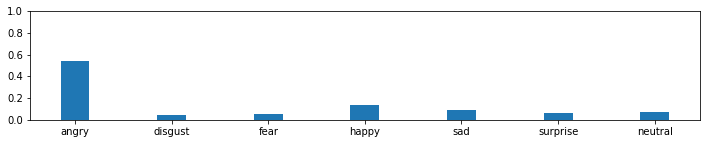

Video reading took 04.4974
Face Recog. took 00.4182
Face Emotion Recog. took 00.837


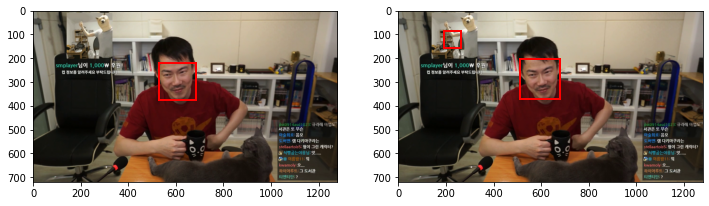

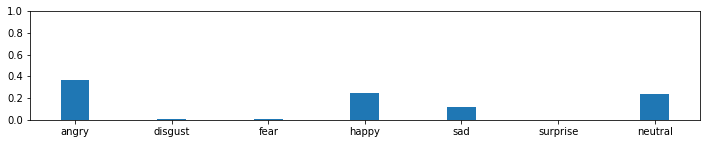

Video reading took 04.5691
Face Recog. took 00.4549
Face Emotion Recog. took 00.792


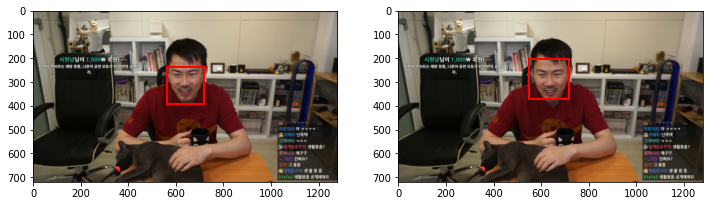

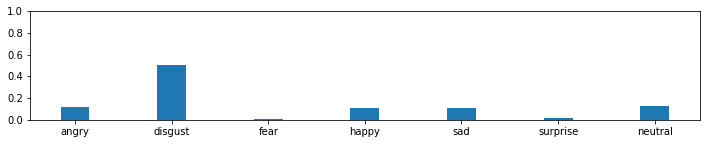

Video reading took 04.4811
Face Recog. took 00.4319
Face Emotion Recog. took 00.823


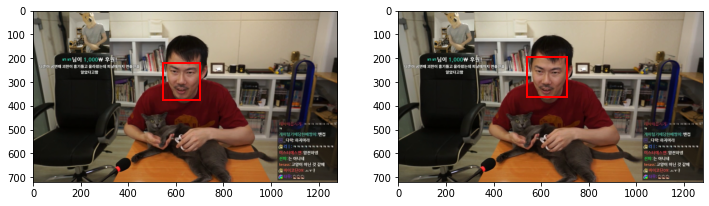

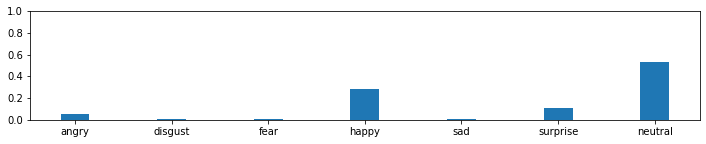

Video reading took 04.6018
Face Recog. took 00.4324
Face Emotion Recog. took 00.1020


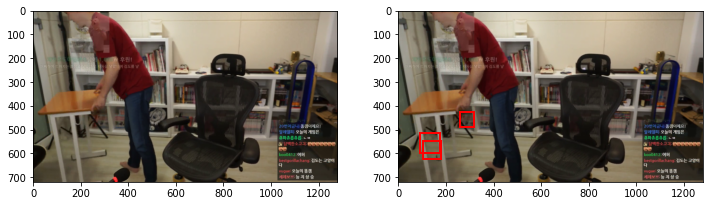

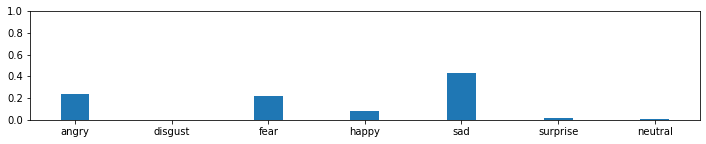

Video reading took 04.5753
Face Recog. took 00.4313
Face Emotion Recog. took 00.414


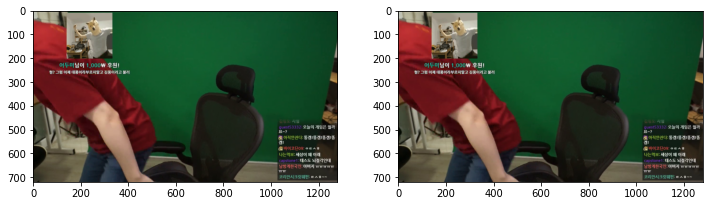

Video reading took 04.5659
Face Recog. took 00.4242
Face Emotion Recog. took 00.670


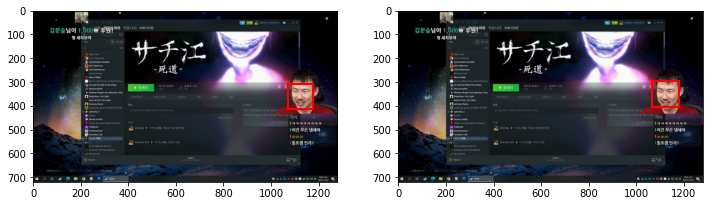

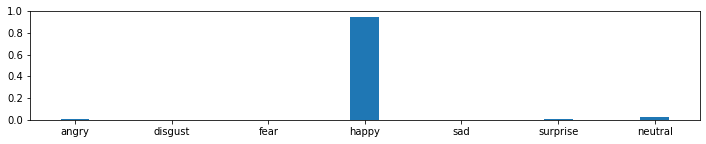

Video reading took 03.9015
Face Recog. took 00.4374
Face Emotion Recog. took 00.566


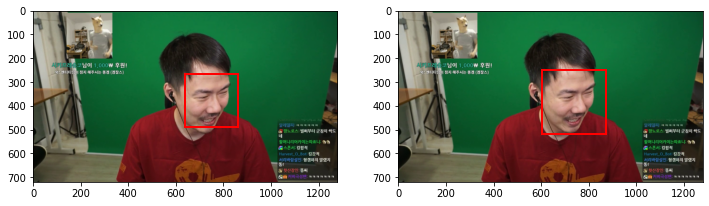

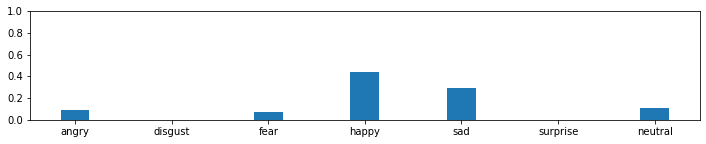

Video reading took 04.891
Face Recog. took 00.4946
Face Emotion Recog. took 00.248


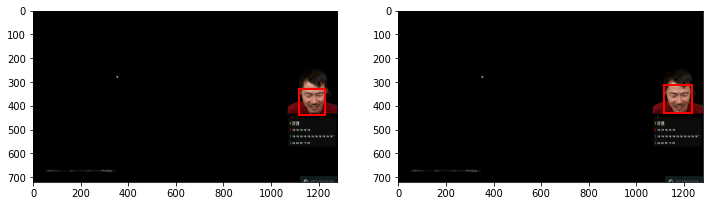

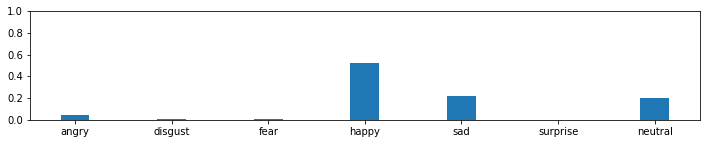

Video reading took 04.888
Face Recog. took 00.4962
Face Emotion Recog. took 00.385


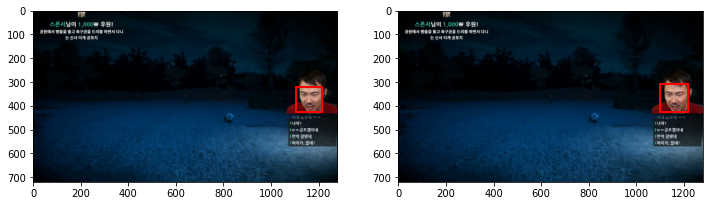

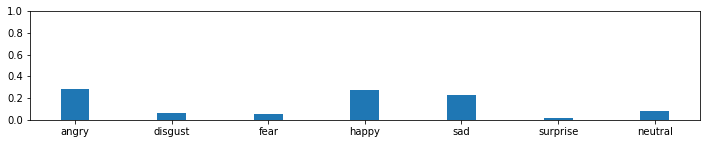

Video reading took 04.4882
Face Recog. took 00.5339
Face Emotion Recog. took 00.894


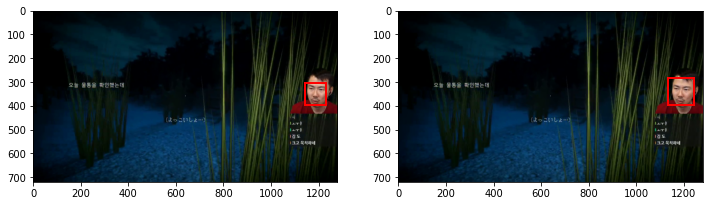

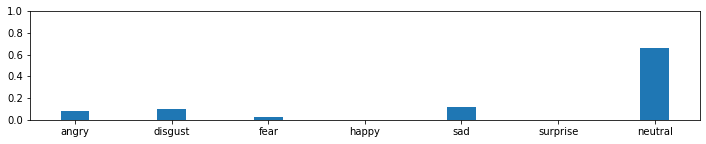

Video reading took 04.9443
Face Recog. took 00.5222
Face Emotion Recog. took 00.266


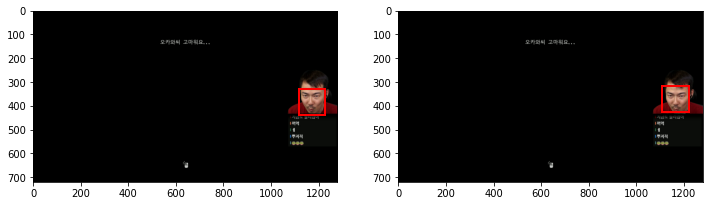

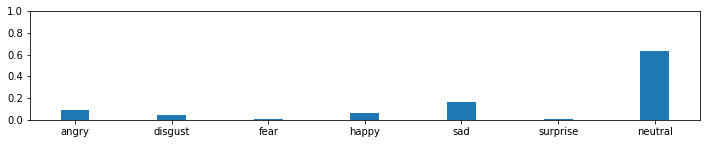

Video reading took 04.7199
Face Recog. took 00.5483
Face Emotion Recog. took 00.1198


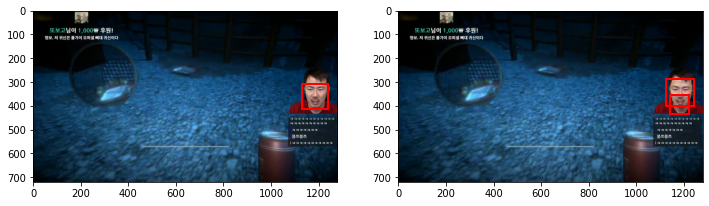

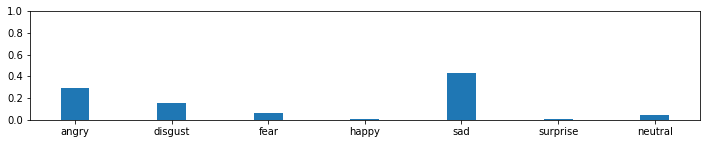

Video reading took 04.7905
Face Recog. took 00.5307
Face Emotion Recog. took 00.426


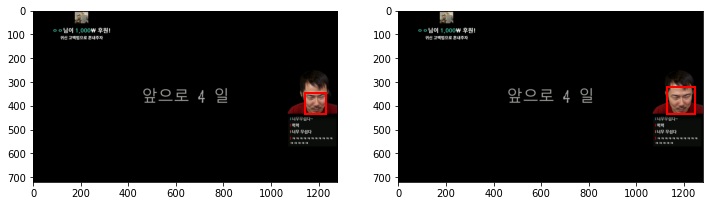

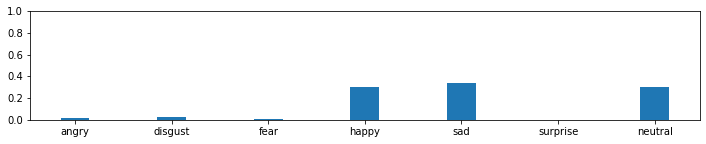

Video reading took 04.6194
Face Recog. took 00.5235
Face Emotion Recog. took 00.314


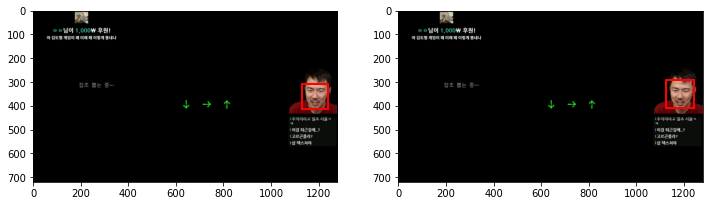

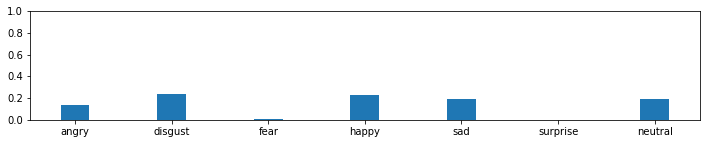

Video reading took 04.3329
Face Recog. took 00.5170
Face Emotion Recog. took 00.588


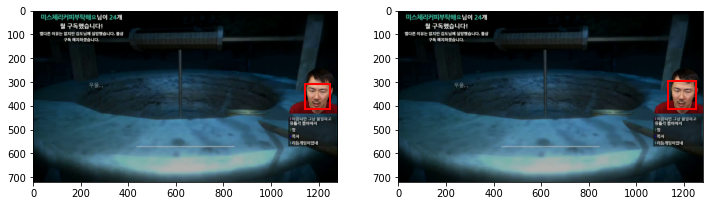

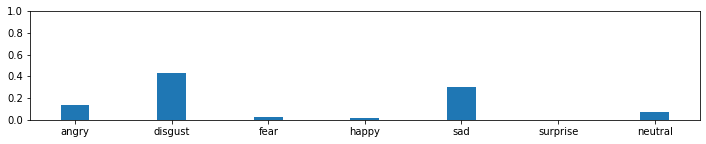

Video reading took 04.8617
Face Recog. took 00.4991
Face Emotion Recog. took 00.351


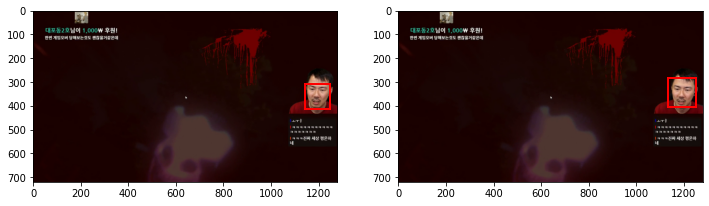

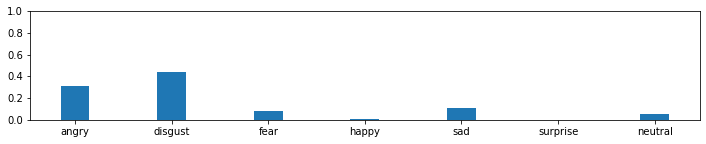

Video reading took 04.6231
Face Recog. took 00.5210
Face Emotion Recog. took 00.593


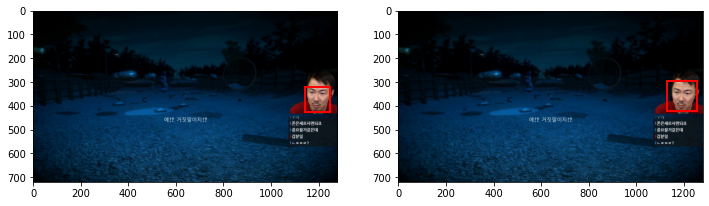

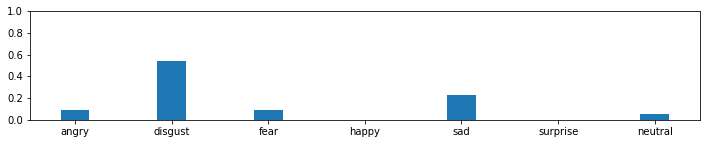

Video reading took 04.6780
Face Recog. took 00.5079
Face Emotion Recog. took 00.481


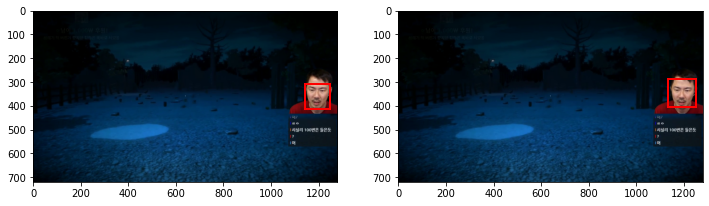

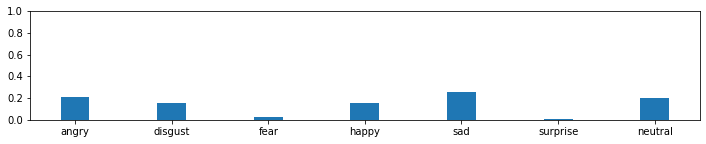

Video reading took 04.2368
Face Recog. took 00.5045
Face Emotion Recog. took 00.606


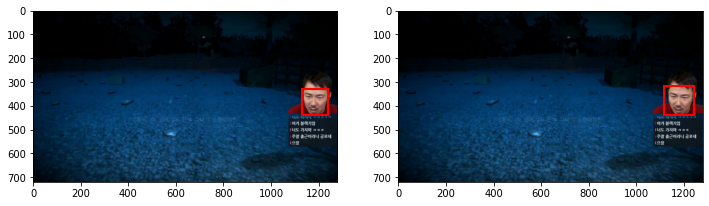

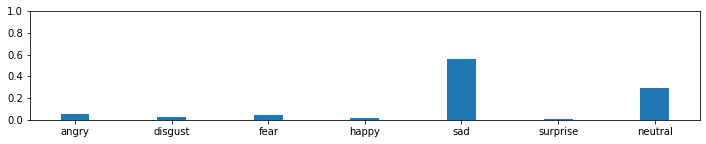

Video reading took 04.4999
Face Recog. took 00.5097
Face Emotion Recog. took 00.793


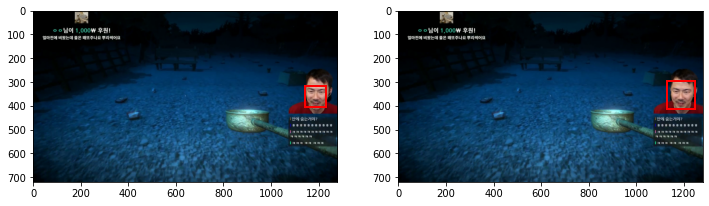

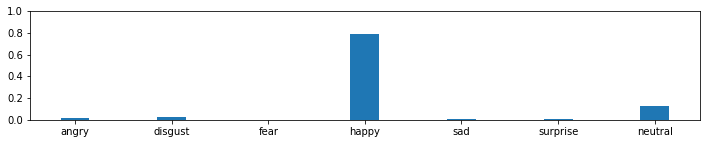

In [12]:
cap = cv2.VideoCapture(video_file)

if (cap.isOpened()== False): 
    print("Error opening video stream or file")

frame_count = 0

count = 0

while(cap.isOpened()):
    
    video_read_begin = datetime.now()
    
    for i in range(6000 - 1):
#         ret, frame = cap.read()
        ret = cap.grab()
    ret, frame = cap.read()
    
    video_read_end = datetime.now()
    
    video_read_time = video_read_end - video_read_begin
    
    print(f'Video reading took {video_read_time.seconds:02d}.{int(video_read_time.microseconds/100)}')
    
    if ret == True:

        fr_begin = datetime.now()
        
        faces = face_locations = face_recognition.face_locations(frame)
        
        fr_end = datetime.now()
        fr_time = fr_end - fr_begin
        
        print(f'Face Recog. took {fr_time.seconds:02d}.{int(fr_time.microseconds/100)}')
    
#         if len(faces) > 0:
        if True:
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))
            
            frame = np.stack((frame[:, :, 2], frame[:, :, 1], frame[:, :, 0]), axis=2)
            
            axes[0].imshow(frame)

            for x1, y1, x2, y2 in face_locations:
                rect = patches.Rectangle((y1, x1), y2 - y1, x2 - x1, edgecolor='r', facecolor="none", linewidth=2)
                axes[0].add_patch(rect)
                
            fer_begin = datetime.now()

            fer_detection = detector.detect_emotions(frame)
            
            fer_end = datetime.now()
            fer_time = fer_end - fer_begin
            
            print(f'Face Emotion Recog. took {fer_time.seconds:02d}.{int(fer_time.microseconds/100)}')

            face_locations = [det['box'] for det in fer_detection]
            emotions = [det['emotions'] for det in fer_detection]

            axes[1].imshow(frame)
            
            for x1, y1, x2, y2 in face_locations:
                rect = patches.Rectangle((x1, y1), x2, y2, edgecolor='r', facecolor="none", linewidth=2)
                axes[1].add_patch(rect)
            
            plt.show()
            
#             print(emotions)
            
            
            if len(emotions) > 0:
                emotion_dict = emotions[0]
                for key in emotion_dict:
                    emotional_history[key].append(emotion_dict[key])
                    
                plt.figure(figsize=(12, 2))
                emotion_keys = [key for key in emotions[0]]
                pos_dummy = np.arange(len(emotion_keys))
                emotion_scores = [emotion_dict[key] for key in emotion_dict]
                plt.bar(pos_dummy, emotion_scores, 0.3, align='center')
                plt.xticks(pos_dummy, emotion_keys)
                plt.ylim([0, 1])
                plt.show()
                
            else:
                emotion_dict = nan_emotion
                for key in emotion_dict:
                    emotional_history[key].append(emotion_dict[key])
                    
            print('=' * 80)
                    
            
            count += 1

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else: 
        break
        
    if count > 30:
        break
    
#     break

cap.release()

cv2.destroyAllWindows()

In [ ]:


# import io
# import scipy.misc
# import numpy as np
# from six import BytesIO
# from PIL import Image, ImageDraw, ImageFont

# import tensorflow as tf

# from object_detection.utils import label_map_util
# from object_detection.utils import config_util
# from object_detection.utils import visualization_utils as viz_utils
# from object_detection.builders import model_builder

# %matplotlib inline

In [ ]:
# # @title Choose the model to use, then evaluate the cell.
# MODELS = {'centernet_with_keypoints': 'centernet_hg104_512x512_kpts_coco17_tpu-32', 
#           'centernet_without_keypoints': 'centernet_hg104_512x512_coco17_tpu-8',
#           'center_resnet': 'centernet_resnet101_v1_fpn_512x512_coco17_tpu-8'}

# # model_display_name = 'centernet_with_keypoints' # @param ['centernet_with_keypoints', 'centernet_without_keypoints']
# model_display_name = 'center_resnet' # @param ['centernet_with_keypoints', 'centernet_without_keypoints']
# model_name = MODELS[model_display_name]

In [ ]:
# pipeline_config = os.path.join('../models/research/object_detection/configs/tf2/',
#                                 model_name + '.config')

# model_dir = '../models/research/object_detection/test_data/checkpoint/'

# # Load pipeline config and build a detection model
# configs = config_util.get_configs_from_pipeline_file(pipeline_config)
# model_config = configs['model']
# detection_model = model_builder.build(
#       model_config=model_config, is_training=False)

# # Restore checkpoint
# ckpt = tf.compat.v2.train.Checkpoint(
#       model=detection_model)
# ckpt.restore(os.path.join(model_dir, 'ckpt-0')).expect_partial()

# def get_model_detection_function(model):
#     """Get a tf.function for detection."""

#     @tf.function
#     def detect_fn(image):
#         """Detect objects in image."""

#         image, shapes = model.preprocess(image)
#         prediction_dict = model.predict(image, shapes)
#         detections = model.postprocess(prediction_dict, shapes)

#         return detections, prediction_dict, tf.reshape(shapes, [-1])

#     return detect_fn

# detect_fn = get_model_detection_function(detection_model)

In [ ]:
log_file_list = sorted(glob('../chats/*.log'))

In [ ]:
print(log_file_list)

In [ ]:
log_file = log_file_list[-1]

In [ ]:
video_file = '../videos/20201003_759209688_Just Chatting.mp4'

In [ ]:
Chat = namedtuple('Chat', 'time id text')

In [ ]:
t0 = datetime.strptime('00:00:00','%H:%M:%S')

In [ ]:
chat_history = list()

with open(log_file, 'r') as file:
    
    count = 0
    for chat in file:
#     chat = next(file).strip()
#         print(chat.strip())
        chat_time = re.search('\[.*?\]', chat)[0]
        user_id_match = re.search('<.*?>', chat)
        user_id = user_id_match[0]
        start_of_chat = user_id_match.span()[-1]
        text = chat[start_of_chat:].strip()
        
        dt = datetime.strptime(chat_time,'[%H:%M:%S]') - t0
#         print(dt.total_seconds())
        
        chat_tuple = Chat(dt.total_seconds(), user_id[1:-1], text)

#         print('{}'.format(chat_tuple))
        chat_history.append(chat_tuple)
        

In [ ]:
chat_time_list = [getattr(chat, 'time') for chat in chat_history]

In [ ]:
max_min = np.int(np.ceil(max(chat_time_list)/60) + 1)

In [ ]:
def express_bins_as_time_range(bins, index_list):
    
    time_range_list = list()
    
    for index in index_list:
        begin = timedelta(seconds=int(bins[index]))
        end = timedelta(seconds=int(bins[index+1]))
        print('[{} ~ {}]'.format(begin, end))
        time_range_list.append((begin, end))
        
    return time_range_list
    

In [ ]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(5)/5, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

In [ ]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(10)/10, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

In [ ]:
print(datetime.now().strftime("%H-%M-%S"))